## Supply Chain Optimization Project

Objective:
Analyze warehouse inventory, refill demand, and logistics issues to identify inefficiencies and support optimization decisions.


In [2]:
import numpy as np
import pandas as pd

DATA CLEANING AND PREPROCESSING 

In [32]:
df= pd.read_csv("FMCG_data.csv")

In [33]:
df.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df.shape

(25000, 24)

In [6]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
df.describe

<bound method NDFrame.describe of       Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0         WH_100000     EID_50000         Urban            Small   West   
1         WH_100001     EID_50001         Rural            Large  North   
2         WH_100002     EID_50002         Rural              Mid  South   
3         WH_100003     EID_50003         Rural              Mid  North   
4         WH_100004     EID_50004         Rural            Large  North   
...             ...           ...           ...              ...    ...   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  

In [9]:
df.isnull().sum()


Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [10]:
num_col=df.select_dtypes(include=np.number).columns
df[num_col]=df[num_col].fillna(df[num_col].median())
num_col

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [11]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
cat_cols

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
grade_map = {'A+':1,'A': 2,'B+':3, 'B': 4, 'C': 1}
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].map(grade_map)

In [14]:
binary_cols = [
    'transport_issue_l1y','storage_issue_reported_l3m',
    'wh_breakdown_l3m','flood_impacted',
    'flood_proof','electric_supply',
    'approved_wh_govt_certificate'
]

for col in binary_cols:
    print(col, df[col].unique())


transport_issue_l1y [1 0 4 3 2 5]
storage_issue_reported_l3m [13  4 17 18 23 24  6 11 22  9 29 19 14 28 25 12  8  0 34 16 38 21 15 36
 31 20 10 32 27 26  7 37 30  5 39 33 35]
wh_breakdown_l3m [5 3 6 4 2 1 0]
flood_impacted [0 1]
flood_proof [1 0]
electric_supply [1 0]
approved_wh_govt_certificate [2 1 4 3]


In [15]:
df[binary_cols] = df[binary_cols].astype(int)

Feature Engineering 

#Warehouse Age

In [18]:
CURRENT_YEAR = 2025
df['warehouse_age'] = CURRENT_YEAR - df['wh_est_year']

In [19]:
df['warehouse_age'] 

0        16.0
1        16.0
2        16.0
3        16.0
4        16.0
         ... 
24995    20.0
24996    13.0
24997    16.0
24998    16.0
24999     6.0
Name: warehouse_age, Length: 25000, dtype: float64

In [20]:
risk_cols = [
    'transport_issue_l1y',
    'storage_issue_reported_l3m',
    'wh_breakdown_l3m',
    'flood_impacted'
]

df['risk_score'] = df[risk_cols].sum(axis=1)

In [21]:
df['risk_score']

0        19
1         7
2        23
3        24
4        26
         ..
24995    24
24996    14
24997    29
24998    24
24999     8
Name: risk_score, Length: 25000, dtype: int64

Outliers

In [22]:
Q1 = df['product_wg_ton'].quantile(0.25)
Q3 = df['product_wg_ton'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['product_wg_ton'] >= Q1 - 1.5 * IQR) &
    (df['product_wg_ton'] <= Q3 + 1.5 * IQR)
]

In [34]:
df.to_csv("clean_supply_chain.csv", index=False)
print("SAVED")

SAVED


EDA

In [24]:
!pip install matplotlib
!pip install seaborn

In [25]:
import matplotlib.pyplot as plt

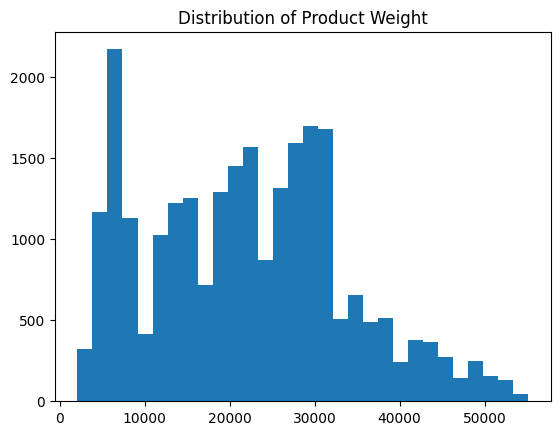

In [26]:
plt.hist(df['product_wg_ton'], bins=30)
plt.title("Distribution of Product Weight")
plt.show()


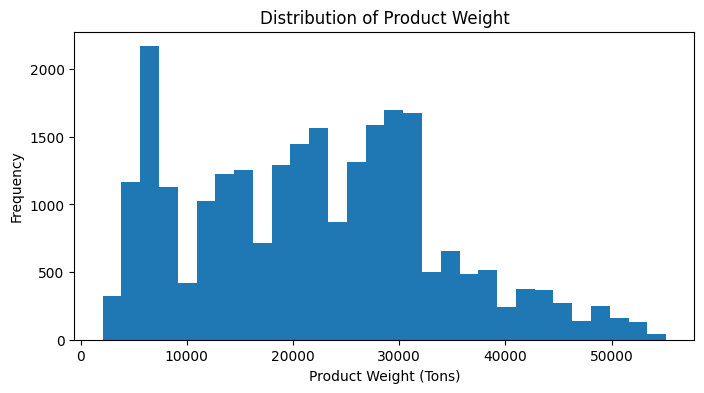

In [27]:
plt.figure(figsize=(8,4))
plt.hist(df['product_wg_ton'], bins=30)
plt.xlabel("Product Weight (Tons)")
plt.ylabel("Frequency")
plt.title("Distribution of Product Weight")
plt.show()


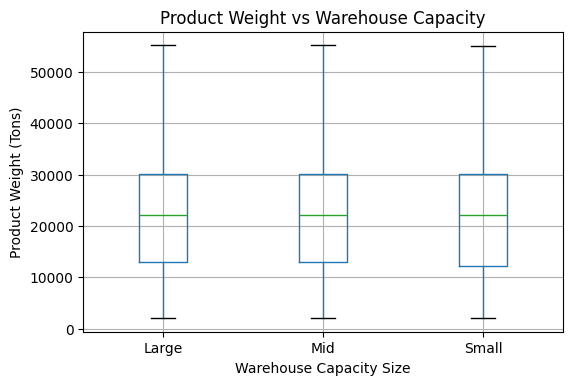

In [28]:
df.boxplot(column='product_wg_ton', by='WH_capacity_size', figsize=(6,4))
plt.title("Product Weight vs Warehouse Capacity")
plt.suptitle("")
plt.xlabel("Warehouse Capacity Size")
plt.ylabel("Product Weight (Tons)")
plt.show()


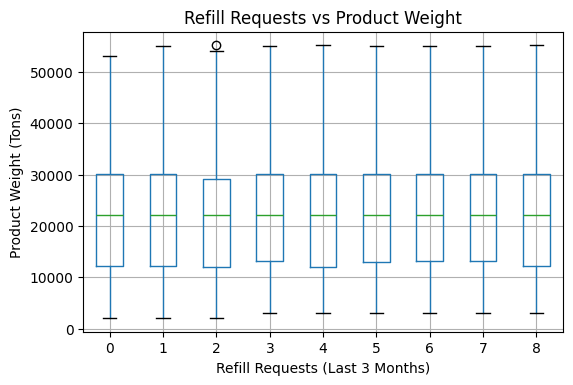

In [29]:
df.boxplot(column='product_wg_ton', by='num_refill_req_l3m', figsize=(6,4))
plt.title("Refill Requests vs Product Weight")
plt.suptitle("")
plt.xlabel("Refill Requests (Last 3 Months)")
plt.ylabel("Product Weight (Tons)")
plt.show()


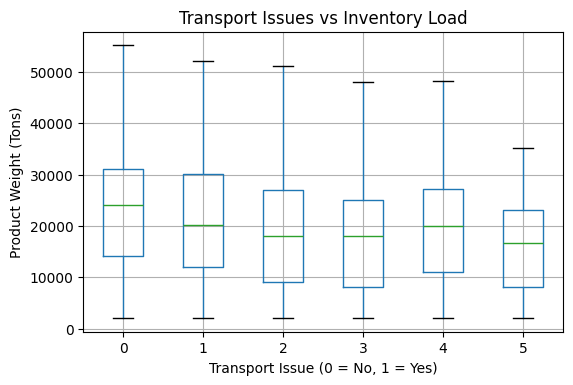

In [30]:
df.boxplot(column='product_wg_ton', by='transport_issue_l1y', figsize=(6,4))
plt.title("Transport Issues vs Inventory Load")
plt.suptitle("")
plt.xlabel("Transport Issue (0 = No, 1 = Yes)")
plt.ylabel("Product Weight (Tons)")
plt.show()


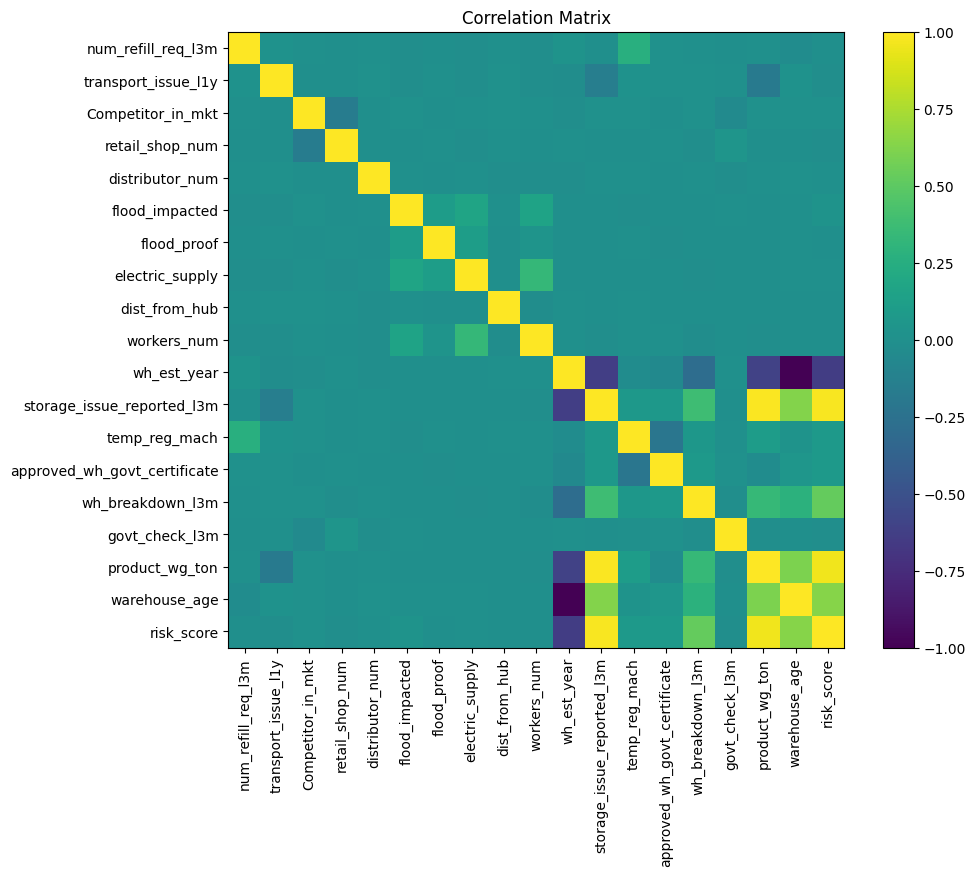

In [31]:
corr = df.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


# Key Business Insights

- Large warehouses show underutilization in certain zones
- Warehouses with transport issues tend to have inconsistent inventory loads
- High refill frequency indicates inefficient demand planning
- Product weight strongly influences refill demand
